In [1]:
!pip install mdptoolbox-hiive
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import hiive.mdptoolbox.example
import time
import numpy as np
import matplotlib.pyplot as plt

  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-cp37-none-any.whl size=35123 sha256=b52c351c1997cc850af35df4f401b1220d8a8c5df68c296071f83af4e009515b
  Stored in directory: /root/.cache/pip/wheels/3a/98/1f/fc66dac0e97571e9c637565c74a78e8604f0a6457a0b6080d2
Successfully built mdptoolbox-hiive


In [2]:
P, R = hiive.mdptoolbox.example.forest(S=3000, r1=4, r2=2, p=0.1, is_sparse=False)
discount = 0.96
max_iter = 50000

In [3]:
vi = ValueIteration(P, R, discount)
vi.setVerbose()
arr_vi = vi.run()
print("Value iteration")

 Iteration   Variation
         1    4.000000
         2    3.456000
         3    2.985984
         4    2.579890
         5    2.229025
         6    1.925878
         7    1.663958
         8    1.437660
         9    1.242138
        10    1.073207
        11    0.927251
        12    0.801145
        13    0.692189
        14    0.598052
        15    0.516717
        16    0.446443
        17    0.385727
        18    0.333268
        19    0.287944
        20    0.248783
        21    0.214949
        22    0.185716
        23    0.160458
        24    0.138636
        25    0.119782
        26    0.103491
        27    0.089416
        28    0.077256
        29    0.066749
        30    0.057671
        31    0.049828
        32    0.043051
        33    0.037196
        34    0.032138
        35    0.027767
        36    0.023991
        37    0.020728
        38    0.017909
        39    0.015473
        40    0.013369
        41    0.011551
        42    0.009980
        43 

In [4]:
pi = PolicyIteration(P, R, discount)
pi.setVerbose()
arr_pi = pi.run()
print("Policy Iteration")

 Iteration   Variation
         1           1
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           1
        10           1
        11           1
        12           1
        13           1
        14           0
Iterating stopped, unchanging policy found.
Policy Iteration


In [5]:
np.random.seed(0)
ql = QLearning(P, R, discount, n_iter = max_iter)
ql.setVerbose()
arr_ql = ql.run()
print("QLearning")
print (arr_ql[-1])

QLearning
{'State': 2890, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 5.656944513320923, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.96, 'Max V': 7.729342085979862, 'Mean V': 0.007221185288266802, 'Iteration': 50000}


In [6]:
np.random.seed(0)
ql_r = QLearning(P, R, discount, n_iter = max_iter)
ql_r.epsilon_min=1
ql_r.alpha_min=1
ql_r.setVerbose()
arr_ql_r = ql_r.run()
print("QLearning Random")
print (arr_ql_r[-1])

QLearning Random
{'State': 2137, 'Action': 1, 'Reward': 1.0, 'Error': 12.755102040816308, 'Time': 4.421609878540039, 'Alpha': 1, 'Epsilon': 1, 'Gamma': 0.96, 'Max V': 12.755102040816308, 'Mean V': 2.0753858866654054, 'Iteration': 50000}


In [7]:
print ("VI policy is the same as PI policy: ", vi.policy==pi.policy)
print ("VI policy is the same as QL policy: ", ql.policy==vi.policy)
print ("QL policy is the same as PI policy: ", ql.policy==pi.policy)
print ("QL policy is the same as QL_R policy: ", ql.policy==ql_r.policy)

VI policy is the same as PI policy:  True
VI policy is the same as QL policy:  False
QL policy is the same as PI policy:  False
QL policy is the same as QL_R policy:  False


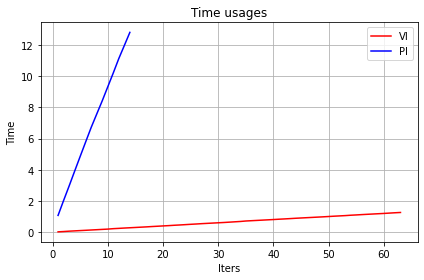

(None, None)

In [8]:
time_vi = []
time_pi = []
iter_vi = []
iter_pi = []
for x in arr_vi:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      time_vi.append(x['Time'])
      if i not in iter_vi:
        iter_vi.append(i)
for x in arr_pi:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      time_pi.append(x['Time'])
      if i not in iter_pi:
        iter_pi.append(i)
plt.grid()
plt.plot(iter_vi, time_vi, color='red', label='VI')
plt.plot(iter_pi, time_pi, color='blue', label='PI')
plt.xlabel('Iters'), plt.ylabel('Time'), plt.legend(loc='best'), plt.title('Time usages')
plt.tight_layout(), plt.show()

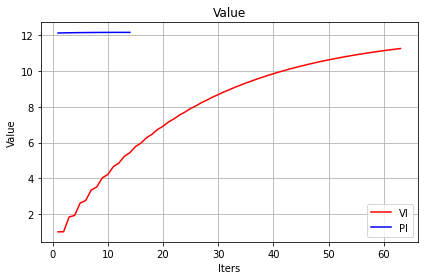

(None, None)

In [9]:
value_vi = []
value_pi = []
for x in arr_vi:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      value_vi.append(x['Mean V'])
for x in arr_pi:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      value_pi.append(x['Mean V'])
plt.grid()
plt.plot(iter_vi, value_vi, color='red', label='VI')
plt.plot(iter_pi, value_pi, color='blue', label='PI')
plt.xlabel('Iters'), plt.ylabel('Value'), plt.legend(loc='best'), plt.title('Value')
plt.tight_layout(), plt.show()

In [10]:
reward = np.zeros(max_iter)
reward_r = np.zeros(max_iter)
error = np.zeros(max_iter)
error_r = np.zeros(max_iter)
iteration = np.arange(1, max_iter+1)
for x in arr_ql:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      error[i-1] = error[i-1]+abs(x['Error'])
      reward[i-1] = reward[i-1]+(x['Reward'])
y = []
y.append(error[0])
for x in arr_ql_r:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      error_r[i-1] = error_r[i-1]+abs(x['Error'])
      reward_r[i-1] = reward_r[i-1]+(x['Reward'])
y_r = []
y_r.append(error_r[0])
for i in range (1, max_iter):
  y.append(abs(error[i]-error[i-1]))
  y_r.append(abs(error_r[i]-error_r[i-1]))

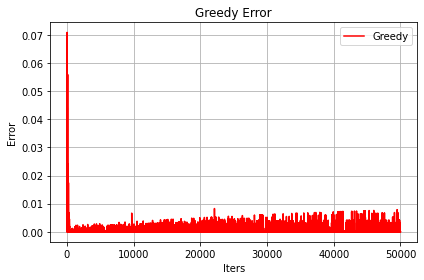

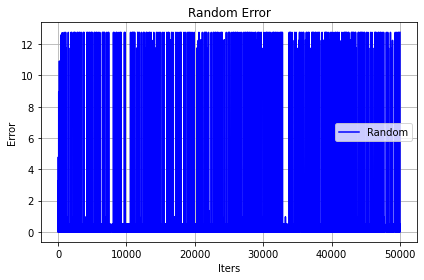

(None, None)

In [11]:
plt.grid()
plt.plot(iteration, y, color='red', label='Greedy')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'),plt.title('Greedy Error')
plt.tight_layout(), plt.show()
plt.grid()
plt.plot(iteration, y_r, color='blue', label='Random')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'),plt.title('Random Error')
plt.tight_layout(), plt.show()

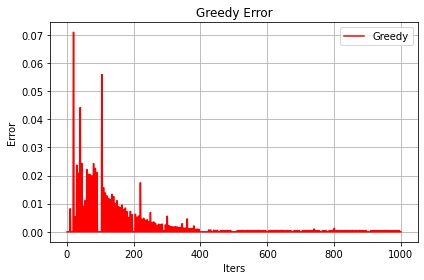

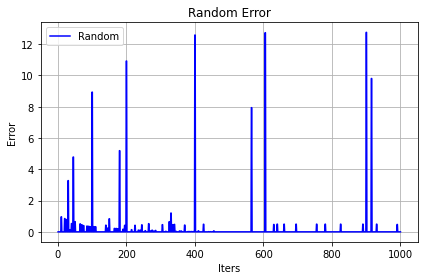

(None, None)

In [12]:
plt.grid()
plt.plot(iteration[:1000], y[:1000], color='red', label='Greedy')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'), plt.title('Greedy Error')
plt.tight_layout(), plt.show()
plt.grid()
plt.plot(iteration[:1000], y_r[:1000], color='blue', label='Random')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'), plt.title('Random Error')
plt.tight_layout(), plt.show()

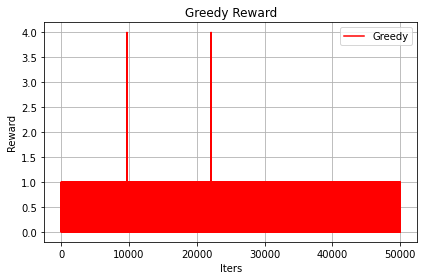

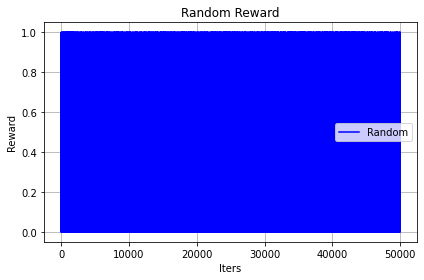

(None, None)

In [13]:
plt.grid()
plt.plot(iteration, reward, color='red', label='Greedy')
plt.xlabel("Iters"), plt.ylabel('Reward'), plt.legend(loc='best'), plt.title('Greedy Reward')
plt.tight_layout(), plt.show()
plt.grid()
plt.plot(iteration, reward_r, color='blue', label='Random' )
plt.xlabel("Iters"), plt.ylabel('Reward'), plt.legend(loc='best'), plt.title('Random Reward')
plt.tight_layout(), plt.show()

# **Now, change the number of state**

In [14]:
P, R = hiive.mdptoolbox.example.forest(S=30, r1=4, r2=2, p=0.1, is_sparse=False)

In [15]:
vi = ValueIteration(P, R, discount)
vi.setVerbose()
arr_vi = vi.run()
print("Value iteration")

 Iteration   Variation
         1    4.000000
         2    3.456000
         3    2.985984
         4    2.579890
         5    2.229025
         6    1.925878
         7    1.663958
         8    1.437660
         9    1.242138
        10    1.073207
        11    0.927251
        12    0.801145
        13    0.692189
        14    0.598052
        15    0.516717
        16    0.446443
        17    0.385727
        18    0.333268
        19    0.287944
        20    0.248783
        21    0.214949
        22    0.185716
        23    0.160458
        24    0.138636
        25    0.119782
        26    0.103491
        27    0.089416
        28    0.077256
        29    0.066749
        30    0.057671
        31    0.049828
        32    0.043051
        33    0.037196
        34    0.032138
        35    0.027767
        36    0.023991
        37    0.020728
        38    0.017909
        39    0.015473
        40    0.013369
        41    0.011551
        42    0.009980
        43 

In [16]:
pi = PolicyIteration(P, R, discount)
pi.setVerbose()
arr_pi = pi.run()
print("Policy Iteration")

 Iteration   Variation
         1           1
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           1
        10           1
        11           1
        12           1
        13           1
        14           0
Iterating stopped, unchanging policy found.
Policy Iteration


In [17]:
np.random.seed(0)
ql = QLearning(P, R, discount, n_iter = max_iter)
ql.setVerbose()
arr_ql = ql.run()
print("QLearning")
print (arr_ql[-1])

QLearning
{'State': 28, 'Action': 1, 'Reward': 1.0, 'Error': 0.007962856961634615, 'Time': 2.42195725440979, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.96, 'Max V': 7.902157913842627, 'Mean V': 0.7775596737894754, 'Iteration': 50000}


In [18]:
np.random.seed(0)
ql_r = QLearning(P, R, discount, n_iter = max_iter)
ql_r.epsilon_min=1
ql_r.alpha_min=1
ql_r.setVerbose()
arr_ql_r = ql_r.run()
print("QLearning Random")
print (arr_ql_r[-1])

QLearning Random
{'State': 7, 'Action': 1, 'Reward': 1.0, 'Error': 0.0, 'Time': 2.7520580291748047, 'Alpha': 1, 'Epsilon': 1, 'Gamma': 0.96, 'Max V': 35.22660852968844, 'Mean V': 15.04683021096975, 'Iteration': 50000}


In [19]:
print ("VI policy is the same as PI policy: ", vi.policy==pi.policy)
print ("VI policy is the same as QL policy: ", ql.policy==vi.policy)
print ("QL policy is the same as PI policy: ", ql.policy==pi.policy)
print ("QL policy is the same as QL_R policy: ", ql.policy==ql_r.policy)

VI policy is the same as PI policy:  True
VI policy is the same as QL policy:  False
QL policy is the same as PI policy:  False
QL policy is the same as QL_R policy:  False


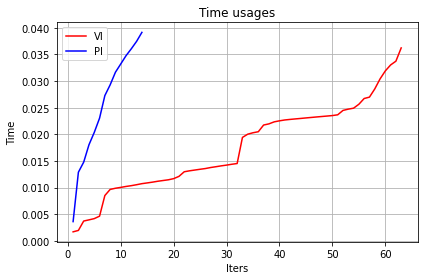

(None, None)

In [20]:
time_vi = []
iter_vi = []
for x in arr_vi:
  time_vi.append(x['Time'])
  iter_vi.append(x['Iteration'])
time_pi = []
iter_pi = []
for x in arr_pi:
  time_pi.append(x['Time'])
  iter_pi.append(x['Iteration'])
plt.grid()
plt.plot(iter_vi, time_vi, color='red', label='VI')
plt.plot(iter_pi, time_pi, color='blue', label='PI')
plt.xlabel('Iters'), plt.ylabel('Time'), plt.legend(loc='best'), plt.title('Time usages')
plt.tight_layout(), plt.show()

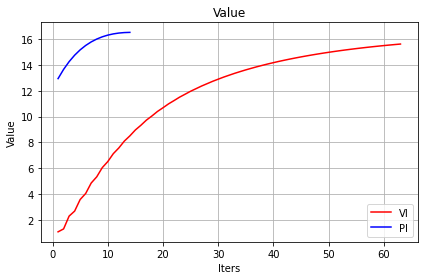

(None, None)

In [21]:
value_vi = []
value_pi = []
for x in arr_vi:
  value_vi.append(x['Mean V'])
for x in arr_pi:
  value_pi.append(x['Mean V'])
plt.grid()
plt.plot(iter_vi, value_vi, color='red', label='VI')
plt.plot(iter_pi, value_pi, color='blue', label='PI')
plt.xlabel('Iters'), plt.ylabel('Value'), plt.legend(loc='best'), plt.title('Value')
plt.tight_layout(), plt.show()

In [22]:
reward = np.zeros(max_iter)
reward_r = np.zeros(max_iter)
error = np.zeros(max_iter)
error_r = np.zeros(max_iter)
iteration = np.arange(1, max_iter+1)
for x in arr_ql:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      error[i-1] = error[i-1]+abs(x['Error'])
      reward[i-1] = reward[i-1]+(x['Reward'])
y = []
y.append(error[0])
for x in arr_ql_r:
  for i in range(1, max_iter+1):
    if x['Iteration'] == i:
      error_r[i-1] = error_r[i-1]+abs(x['Error'])
      reward_r[i-1] = reward_r[i-1]+(x['Reward'])
y_r = []
y_r.append(error_r[0])
for i in range (1, max_iter):
  y.append(abs(error[i]-error[i-1]))
  y_r.append(abs(error_r[i]-error_r[i-1]))

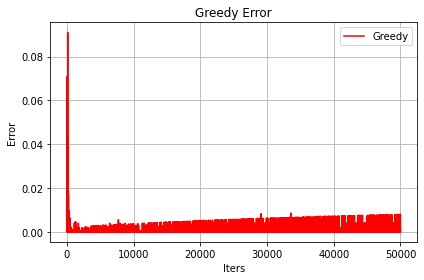

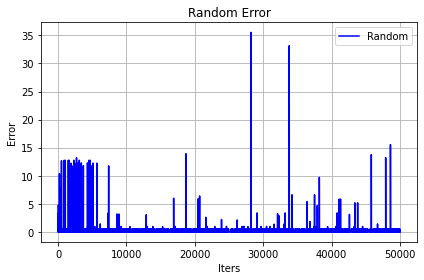

(None, None)

In [23]:
plt.grid()
plt.plot(iteration, y, color='red', label='Greedy')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'),plt.title('Greedy Error')
plt.tight_layout(), plt.show()
plt.grid()
plt.plot(iteration, y_r, color='blue', label='Random')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'),plt.title('Random Error')
plt.tight_layout(), plt.show()

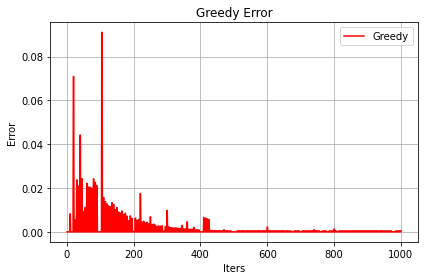

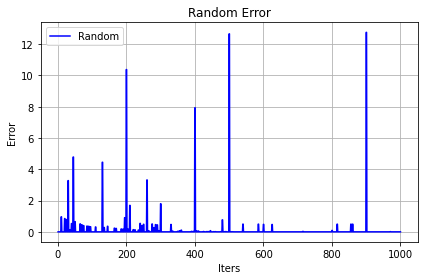

(None, None)

In [24]:
plt.grid()
plt.plot(iteration[:1000], y[:1000], color='red', label='Greedy')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'), plt.title('Greedy Error')
plt.tight_layout(), plt.show()
plt.grid()
plt.plot(iteration[:1000], y_r[:1000], color='blue', label='Random')
plt.xlabel("Iters"), plt.ylabel('Error'), plt.legend(loc='best'), plt.title('Random Error')
plt.tight_layout(), plt.show()

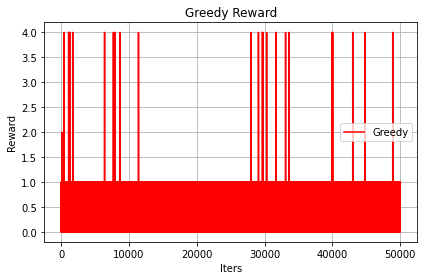

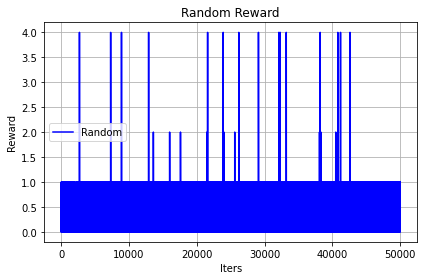

(None, None)

In [25]:
plt.grid()
plt.plot(iteration, reward, color='red', label='Greedy')
plt.xlabel("Iters"), plt.ylabel('Reward'), plt.legend(loc='best'), plt.title('Greedy Reward')
plt.tight_layout(), plt.show()
plt.grid()
plt.plot(iteration, reward_r, color='blue', label='Random' )
plt.xlabel("Iters"), plt.ylabel('Reward'), plt.legend(loc='best'), plt.title('Random Reward')
plt.tight_layout(), plt.show()

In [28]:
print ("QL reach max reward times: ", (reward==4).sum())
print ("QL Random reach max reward times: ", (reward_r==4).sum())

QL reach max reward times:  37
QL Random reach max reward times:  15
